In [62]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("fulldataset.csv")
df.head()

None


,casenum,statenum,vehnum,persontotal,agemin,agemax,numfatal,day,month,year,date,modelyear,make,makename,cellphoneuse
0,211,1,1,2,82,82,1,9,2,2016,16-Feb,2015,12,Ford,0
1,227,1,1,1,18,18,0,2,1,2016,16-Jan,2011,12,Ford,0
2,239,1,1,3,25,42,2,3,5,2016,16-May,2009,12,Ford,0
3,264,1,1,1,68,68,0,12,5,2016,16-May,2010,12,Ford,0
4,271,1,1,1,44,44,1,18,5,2016,16-May,2011,12,Ford,0


**Clustering Graph**

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams

import matplotlib.cm as cm
import matplotlib as mpl
from cycler import cycler
from palettable.colorbrewer.qualitative import Dark2_7


dark2_cmap = Dark2_7
dark2_colors = dark2_cmap.mpl_colors

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.prop_cycle'] = cycler('color',dark2_colors)
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore', message='Polyfit*')

In [8]:
import random
import copy
def scatter_by(df, scatterx, scattery, by=None, figure=None, axes=None, colorscale=dark2_cmap, labeler={}, mfunc=None, setupfunc=None, mms=8):
    cs=copy.deepcopy(colorscale.mpl_colors)
    if not figure:
        figure=plt.figure(figsize=(8,8))
    if not axes:
        axes=figure.gca()
    x=df[scatterx]
    y=df[scattery]
    if not by:
        col=random.choice(cs)
        axes.scatter(x, y, cmap=colorscale, c=col)
        if setupfunc:
            axeslist=setupfunc(axes, figure)
        else:
            axeslist=[axes]
        if mfunc:
            mfunc(axeslist,x,y,color=col, mms=mms)
    else:
        cs=list(np.linspace(0,1,len(df.groupby(by))))
        xlimsd={}
        ylimsd={}
        xs={}
        ys={}
        cold={}
        for k,g in df.groupby(by):
            col=cs.pop()
            x=g[scatterx]
            y=g[scattery]
            xs[k]=x
            ys[k]=y
            c=colorscale.mpl_colormap(col)
            cold[k]=c
            axes.scatter(x, y, c=c, label=labeler.get(k,k), s=40, alpha=0.3);
            xlimsd[k]=axes.get_xlim()
            ylimsd[k]=axes.get_ylim()
        xlims=[min([xlimsd[k][0] for k in xlimsd.keys()]), max([xlimsd[k][1] for k in xlimsd.keys()])]
        ylims=[min([ylimsd[k][0] for k in ylimsd.keys()]), max([ylimsd[k][1] for k in ylimsd.keys()])]
        axes.set_xlim(xlims)
        axes.set_ylim(ylims)
        if setupfunc:
            axeslist=setupfunc(axes, figure)
        else:
            axeslist=[axes]
        if mfunc:
            for k in xs.keys():
                mfunc(axeslist,xs[k],ys[k],color=cold[k], mms=mms);
    axes.set_xlabel(scatterx);
    axes.set_ylabel(scattery);
    
    return axes

def make_rug(axeslist, x, y, color='b', mms=8):
    axes=axeslist[0]
    zerosx1=np.zeros(len(x))
    zerosx2=np.zeros(len(x))
    xlims=axes.get_xlim()
    ylims=axes.get_ylim()
    zerosx1.fill(ylims[1])
    zerosx2.fill(xlims[1])
    axes.plot(x, zerosx1, marker='|', color=color, ms=mms)
    axes.plot(zerosx2, y, marker='_', color=color, ms=mms)
    axes.set_xlim(xlims)
    axes.set_ylim(ylims)
    return axes

In [75]:
"""newdf = df[['agemax','make']]
newdf.index.name = None 
print(newdf)
newdf.drop_duplicates(keep = False)
print(ndf)
newdf.sort_values(by=['agemax'], inplace=True, ascending=True)

#print(ndf)

grouped = df.groupby([df['agemax'],df['make']])

pertotl = grouped['persontotal'].sum()


print(pertotl)# Notice the agg function becomes the column name

grouped = df.groupby([df['agemax'],df['make']])
#print(grouped)

print("\n\nUsing a dictionary to define aggregation:")
#print(grouped.agg({'data1': 'sum', 'data2': np.mean}))"""

      agemax  make
0         82    12
1         18    12
2         42    12
3         68    12
4         44    12
5         25    12
6         50    12
7         58    12
8         72    12
9         48    12
10        40    12
11        52    12
12        33    12
13        28    12
14        37    12
15        42    12
16        36    12
17        41    12
18        43    12
19        36    12
20        77    12
21        37    12
22        53    12
23        78    12
24        26    12
25        27    12
26        33    12
27        91    12
28        33    12
29        75    12
...      ...   ...
1765      33    42
1766      31    42
1767      40    42
1768      66    42
1769      63    42
1770      51    42
1771      28    42
1772      51    42
1773      26    42
1774      55    42
1775      45    42
1776      59    42
1777      46    42
1778      24    42
1779      28    42
1780      41    42
1781      33    42
1782      30    42
1783      48    51
1784      36    51
1785      64

/Users/maddiewarndorf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,1,'Cluster of Agemax vs. Sum(Persontotal) by Make')

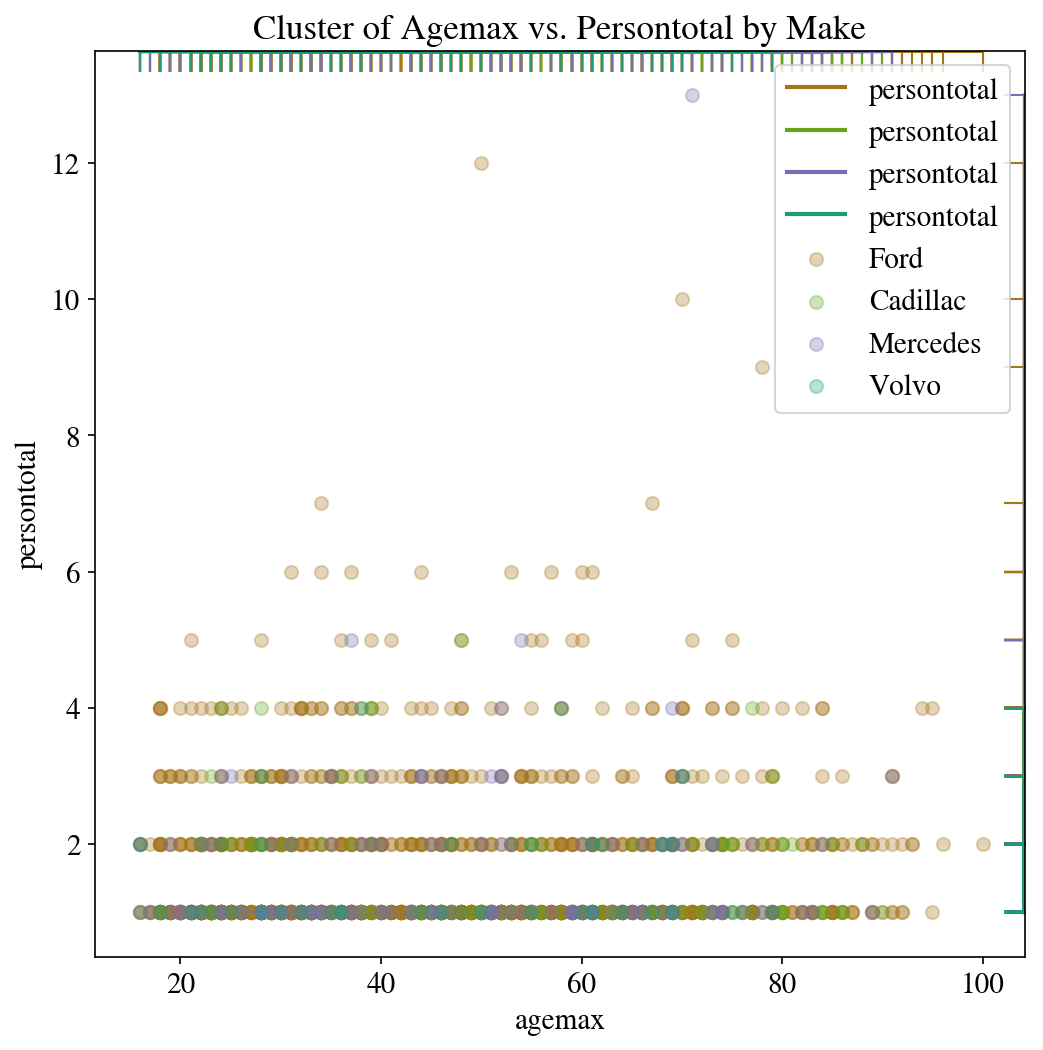

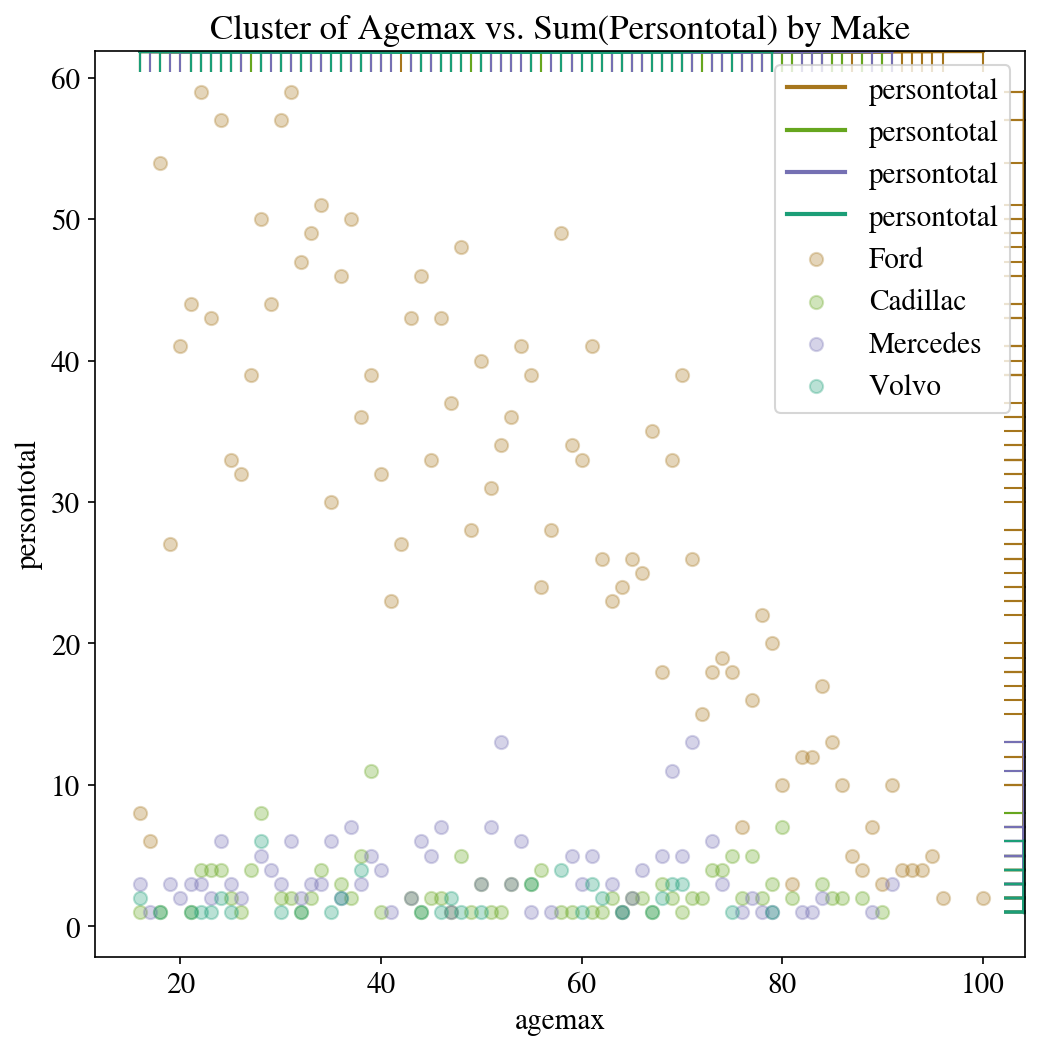

In [77]:
ndf=pd.read_csv("agemakepers.csv")
dkeys=[12,19,42,51]
dvals=['Ford','Cadillac','Mercedes','Volvo']
dmap={e[0]:e[1] for e in zip(dkeys,dvals)}

ax=scatter_by(df, 'agemax', 'persontotal', by='make', labeler=dmap, mfunc=make_rug, mms=20)
ax.grid(False)
ax.legend(loc='upper right');
ax.set_title("Cluster of Agemax vs. Persontotal by Make")

ax=scatter_by(ndf, 'agemax', 'persontotal', by='make', labeler=dmap, mfunc=make_rug, mms=20)
ax.grid(False)
ax.legend(loc='upper right');
ax.set_title("Cluster of Agemax vs. Sum(Persontotal) by Make")

**Scatterplot**

Text(0,0.5,'Numfatal')

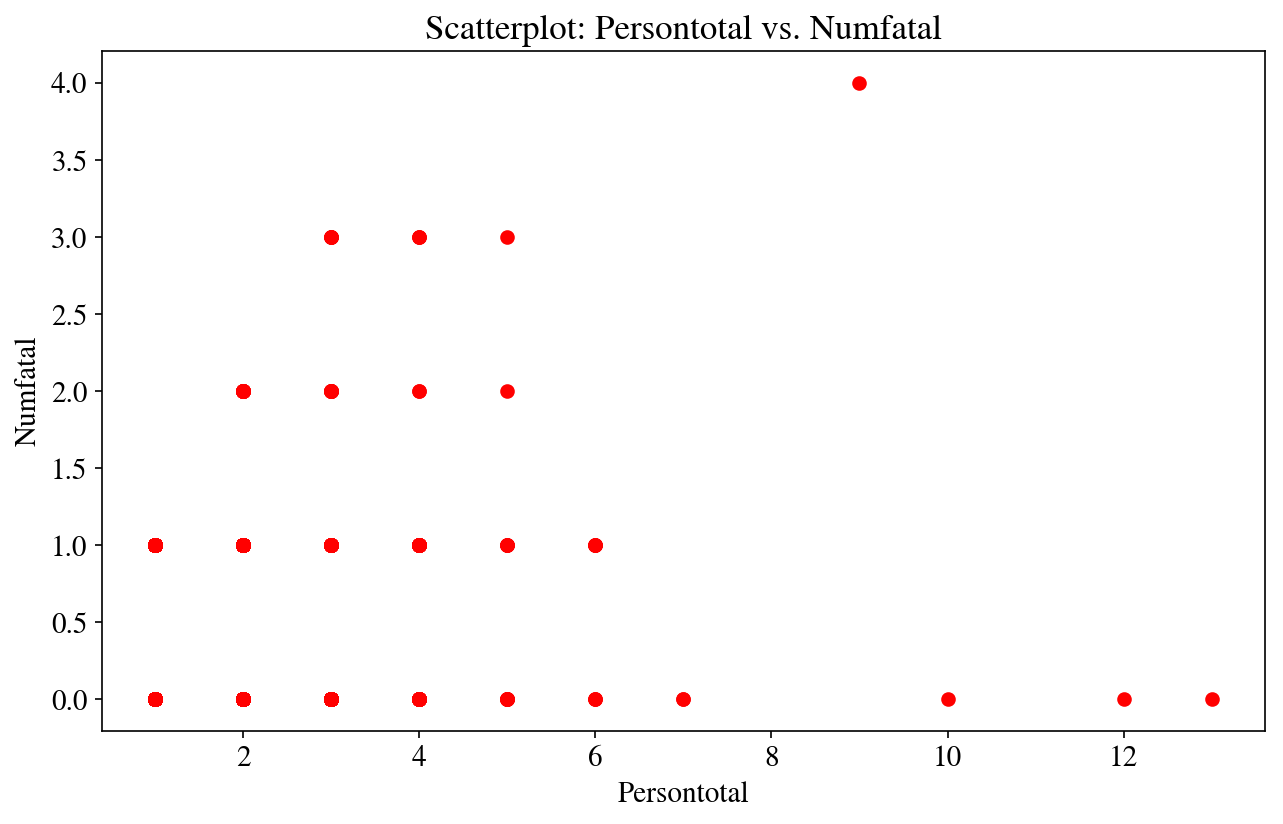

In [16]:
data = df[['persontotal','numfatal']]
plt.scatter(data["persontotal"], data["numfatal"],c='r')
plt.title("Scatterplot: Persontotal vs. Numfatal")
plt.xlabel("Persontotal")
plt.ylabel("Numfatal")